# Cardiovascular Disease Classification

This notebook is going to be looking at the csv file called cardio_dataset. It contains the following columns:  
__age__ - original in days (int) will change to years (int)  
__height__ - original in cm (int) will change to inches (int)    
__weight__ - originally in kg (float) will change to pounds (float)  
__gender__ - originally 1 represents women and 2 men (categorical). Will change 2 to 0 to represent men (binary)     
__ap_hi__ (Systolic blood pressure) - int   
__ap_lo__ (Diastolic blood pressure) - int  
__cholestrerol__ - 1: normal, 2: above normal, 3: well above normal  
__gluc__ - 1: normal, 2: above normal, 3: well above normal  
__smoke__ - binary  
__alco__ (alcohol intake) - binary  
__active__ (physicl activity) - binary  
__cardio__ (cardiovasular disease) - binary   

In [1]:
# Import Required Libraries
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import in the csv and view the first 5 elements 
df = pd.read_csv("cardio_dataset.csv")
df.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0


In [3]:
# remove Id column
df.drop(['id'], axis = 1, inplace = True)

In [4]:
# change age into years rather than days (formula: days/365 = years) 
df['age'] = (df['age']/365).astype(int)
df['age'].head(10)

0    50
1    55
2    51
3    48
4    47
5    60
6    60
7    61
8    48
9    54
Name: age, dtype: int32

In [5]:
# convert weight to lbs (formula: kg * 2.20462262185 = Ibs)
df['weight'] = round(df['weight']*2.20462262185, 2)
df['weight'].head(10)

0    136.69
1    187.39
2    141.10
3    180.78
4    123.46
5    147.71
6    205.03
7    209.44
8    156.53
9    149.91
Name: weight, dtype: float64

In [6]:
# convert height to inches (formula: cm/2.54)
df['height'] = round(df['height']/2.54, 0)
df['height'].head(10)

0    66.0
1    61.0
2    65.0
3    67.0
4    61.0
5    59.0
6    62.0
7    70.0
8    62.0
9    65.0
Name: height, dtype: float64

In [7]:
# make males 0 and keep women as 1 
df['gender'].replace({2:0}, inplace = True)

In [8]:
# describe the dataframe
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,0.650429,64.741786,163.595245,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,3.278625,31.737426,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,0.000000,22.000000,22.050000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,63.000000,143.300000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,65.000000,158.730000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,67.000000,180.780000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,98.000000,440.920000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.shape

(70000, 12)

In [10]:
print('What percentage of the data is duplicated: ', round((len(df)-len(df.drop_duplicates()))/(len(df)) * 100, 5))

What percentage of the data is duplicated:  7.63143


In [11]:
# removing all duplicates since it would be removing less than 1% of my data 
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(64658, 12)

In [13]:
# checking to see if my data contains any missing values 
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## OUTLIER ANALYSIS

### Age
for the age see the person with the smallest age and the person with the largest age. If the smallest age is 0 or less than 0 then remove it. Also is less than 10 and they have cardiovasular disease then remove because the likelihood of that is extremely low. 

In [14]:
print('The person with the smallest age in the df is:')
df['age'].min()

The person with the smallest age in the df is:


29

In [15]:
print('The person with the largest age in the df is:')
df['age'].max()

The person with the largest age in the df is:


64

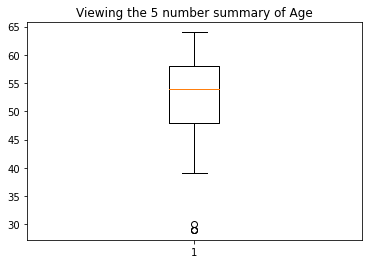

In [16]:
plt.boxplot(df['age'])
plt.title('Viewing the 5 number summary of Age')
plt.show()

since the boxplot showed that the values below 40/39 were outliers I wanted to check what value they had in the cardio column. They all have a 0 which means they don't have a cardiovascular disease which makes sense because of their age. So they wont be removed 

In [17]:
df.nsmallest(10, ['age'])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6219,29,1,69.0,130.07,120,80,1,1,0,0,1,0
22343,29,0,69.0,202.83,100,60,1,1,0,0,1,0
30666,29,1,63.0,130.07,120,80,1,1,0,0,1,0
55905,30,1,63.0,130.07,110,70,1,1,0,0,1,0
14,39,0,71.0,209.44,130,90,1,1,1,1,1,0
25,39,1,60.0,143.30,130,100,2,1,0,0,1,0
28,39,0,65.0,145.51,120,80,1,1,0,0,1,0
53,39,1,65.0,169.76,135,90,3,3,0,0,1,1
106,39,0,64.0,132.28,120,80,2,1,0,0,1,1
107,39,0,65.0,105.82,110,70,1,2,1,1,1,1


### Gender
This feature tells me if the person is male or female. 1 represents the female and 0 represents the males in the dataset. I am going to be checking to make sure that the values are only 1 and 0 in the dataset for this feature. Also making sure their isn't an only 10 or 20 values for males or females. If there happens to be a way too big of an majority for one gender than remove the other. 

In [18]:
# check to see if gender only has two values (0 and 1)
df['gender'].value_counts(dropna = False)

1    41383
0    23275
Name: gender, dtype: int64

### Height (in feet)
For height check the make sure the smallest height and largest height make sense.  

The following information was obtained from the sites listed below:   
1) https://www.healthline.com/health/average-height-for-men#u.s.-height  
2) https://www.healthline.com/health/womens-health/average-height-for-women#:~:text=How%20tall%20are%20American%20women,average%20weight%20is%20170.6%20pounds.   


__For women__:    
The average height for a women in the US is 5ft'4in. So I am going to make the lowest height for a female 5ft. In inches 5ft is 60 inches. For the largest height make sure it is less than 6 ft because in the US less than 1% of females are above 6 ft. In inches 6ft is 72 inches.   

Since too many females were less than 5 ft I couldn't use that as my lowest height, So instead I choose 4'8. In inches that is 56 inches.

__For male__:  
The average height for a male in the US is 5ft'9in. Get rid of all the heights for male that are below 5ft'4in, in inches that would be 64 inches. But also make sure that the amount of rows you are going to get rid of isn't too many. For the largest height make sure it is less than 7ft because about 14.5% of males are above 6ft so we want to include them but it is highly unlikely someone above 6ft took part in this study. Someone who is 7ft is 84 inches. So keep everyone less than 84 inches.  

Since too many males were less than 5ft'4in (64 inches) I couldn't use that as my lowest height. So instead I choose 5ft'2in (62 inches).

In [19]:
# check to see the smallest height (feet)
df.nsmallest(5, ['height'])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
22723,64,1,22.0,178.57,130,90,1,1,0,0,1,1
66643,51,1,22.0,134.48,130,90,1,1,0,0,1,1
64115,50,1,23.0,127.87,125,67,1,1,0,0,0,0
29157,52,1,24.0,152.12,110,70,1,1,0,0,0,0
27603,57,1,25.0,134.48,130,70,1,1,0,0,1,0


In [20]:
# check to see the largest height (feet) 
df.nlargest(5, ['height'])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
6486,58,1,98.0,189.60,140,100,3,1,0,0,1,1
21628,52,0,81.0,171.96,100,70,1,1,0,1,1,0
41901,52,0,79.0,220.46,170,1100,2,2,0,0,1,1
1117,60,0,78.0,149.91,120,80,1,1,0,0,1,1
3237,44,0,78.0,134.48,110,70,1,1,0,0,1,1


In [21]:
# how many females heights are less than 5 ft (60 inches)
f_below_five = len(df[(df['height'] < 60 ) & (df['gender'] == 1)]) # 86 rows 
print("What percentage of females have a height below 5 ft(60 inches): ",round((f_below_five / len(df)) * 100, 2), '%')

What percentage of females have a height below 5 ft(60 inches):  4.64 %


In [22]:
# Try to see how many females are below 4ft'8in(56 inches). Because too many are around 5ft 
f_below_four = len(df[(df['height'] < 56 ) & (df['gender'] == 1)]) # 86 rows 
print("What percentage of females have a height below 4ft'8in (56 inches): ",round((f_below_four / len(df)) * 100, 2), '%')

What percentage of females have a height below 4ft'8in (56 inches):  0.22 %


In [23]:
# how many males heights are less than 5ft'4in (64 inches)
m_below_six = len(df[(df['height'] < 64) & (df['gender'] == 0)])
print("What percentage of males have a height below 5ft'4in (64 inches): ", round((m_below_six/len(df))*100, 2), '%')

What percentage of males have a height below 5ft'4in (64 inches):  3.67 %


In [24]:
# Try to see how many males are below 5ft'2in(62 inches). Because too many are around 5ft'4in
m_below_six = len(df[(df['height'] < 62) & (df['gender'] == 0)])
print("What percentage of males have a height below 5ft'2in (62 inches): ", round((m_below_six/len(df))*100, 2), '%')

What percentage of males have a height below 5ft'2in (62 inches):  0.93 %


Removing heights of those people below 4ft'8in for females and below 5ft'2in for males. The reason for that is because in total they make up around 1% of the data and I am okay will removing that many values. 

In [25]:
# remove the rows of females with height less than 4ft'8in (56 inches) 
df.drop(df[(df['height'] < 56) & (df['gender'] == 1)].index, inplace = True)

In [26]:
# remove the rows of males with height less than 5.2 ft (62 inches)
df.drop(df[(df['height'] < 62) & (df['gender'] == 0)].index, inplace = True)

In [27]:
# since only 1 person has a height above 7 ft it is okay to remove that row (84 inches)
df.drop(df[df['height']> 84].index, inplace = True)

In [28]:
# making sure the drop worked 
df['height'].min()

56.0

In [29]:
# making sure the largest value isn't above 7 ft 
df['height'].max()

81.0

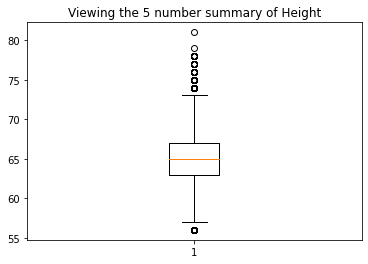

In [30]:
# keeping the 6 ft because they aren't really outliers
plt.boxplot(df['height'])
plt.title('Viewing the 5 number summary of Height')
plt.show()

### Weight (in pounds)

For weight check the smallest and largest values. Make sure that the values make sense.  

The following information was obtained from the site listed below:   
1) https://www.multicare.org/rockwood-clinic-services-bariatrics-bmi/  

__For female__:  
For women since the smallest height is 4'8 ft in the df. The ideal weight for that height is 70 Ibs and higher. I will only keep the weight of the individuals whos weight is __60 Ibs__ and higher to include underweight individuals as well. Also before getting rid of the rows need to make sure that we are getting rid of too many values. 

__For male__:  
For male since the smallest height is 5'2ft in the df. The ideal weight for a male of that height is 102 Ibs and higher. I will only keep the weight of the individuals whos weight is __90 Ibs__ and higher to include underweight individuals as well. Also before getting rid of the rows need to make sure that we are getting rid of too many values. 

In [31]:
print('The minimum weight is: ', df['weight'].min())

The minimum weight is:  22.05


In [32]:
print('The maximum weight is: ', df['weight'].max())

The maximum weight is:  440.92


In [33]:
df.nsmallest(10, 'weight')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
57858,51,0,65.0,22.05,180,1100,2,2,0,0,1,1
33817,59,0,70.0,24.25,130,90,1,1,0,0,1,1
60188,59,1,64.0,46.30,120,80,2,1,0,0,1,1
29488,55,0,70.0,48.50,120,80,1,1,1,1,1,0
26806,63,1,62.0,50.71,110,80,1,1,0,0,1,0
60699,51,1,67.0,63.93,110,70,2,1,0,0,1,1
18559,49,1,63.0,66.14,120,80,1,1,0,0,1,1
41905,58,1,56.0,66.14,103,61,2,1,0,0,1,0
16906,47,0,67.0,68.34,150,90,2,2,0,0,1,1
22016,42,1,57.0,70.55,100,70,1,1,0,0,0,0


In [34]:
# check to see how many females are below the weight of 60 pounds 
f_lowest_weights = len(df[(df['weight'] < 60) & (df['gender'] == 1)])
print('The % of females with weights below 60 are: ', round((f_lowest_weights/len(df))*100, 10))

The % of females with weights below 60 are:  0.0031292538


In [35]:
# check to see how many males are below the weight of 90 
m_lowest_weights = len(df[(df['weight'] < 90) & (df['gender'] == 0)])
print('The % of males with weights below 90 are: ', round((f_lowest_weights/len(df))*100, 10))

The % of males with weights below 90 are:  0.0031292538


In [36]:
df.drop(df[(df['weight'] < 60) & (df['gender'] == 1)].index, inplace = True)
df.drop(df[(df['weight'] < 90) & (df['gender'] == 0)].index, inplace = True)

In [37]:
df['weight'].min()

63.93

In [38]:
df.nlargest(10, 'weight')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
435,45,1,73.0,440.92,130,70,1,1,0,0,0,0
50413,41,0,71.0,440.92,150,90,1,1,0,0,1,1
61285,57,0,71.0,403.45,110,80,3,3,0,1,1,1
36780,53,1,63.0,399.04,180,1100,2,1,0,0,1,1
4743,47,0,69.0,396.83,140,90,1,1,0,0,1,1
45378,47,0,75.0,396.83,140,80,2,2,0,0,1,1
60592,51,0,71.0,396.83,140,100,3,1,0,0,1,1
61362,45,0,77.0,396.83,130,80,3,1,0,0,1,1
20092,56,0,65.0,392.42,120,80,1,1,1,1,1,0
61788,51,0,65.0,392.42,120,80,1,1,0,0,1,0


In [39]:
# how many people fall above 300 pounds and since there are over 100 people dont get rid of that data 
len(df[df['weight'] > 300])

118

<br /> 

### Systolic blood pressure (ap_hi)
This feature measures "the force your heart exerts on the walls of your arteries each time it beats." (mayoclinic)   

The following information was obtained from the following sites:   
1) https://www.healthline.com/health/high-blood-pressure-hypertension/blood-pressure-reading-explained#normal   
2) https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982  
3) https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465   

This feature has a range of what is considered normal and above normal and what is considered below normal. __Normal range fall inbetween 90 and 120__. While __below normal is below 90__. While being __above normal is 120 till 180__ is bad and being __above 180 is horrible__ and you should see a doctor. 


Since systolic blood pressure can be below 90 keep people with low systolic blood pressure in the dataset. Make the __lowest it can be around 60__.   
The same goes for the values above 180, keep them but make sure they __don't go beyond 300__ because there are that many values above 300 and the ones that are above 300 don't make sense.   

In [40]:
df['ap_hi'].min()

-150

In [41]:
df['ap_hi'].max()

16020

{'whiskers': [<matplotlib.lines.Line2D at 0x26d2f1eaa60>,
 'caps': [<matplotlib.lines.Line2D at 0x26d2f1f6160>,
 'boxes': [<matplotlib.lines.Line2D at 0x26d2f1ea700>],
 'medians': [<matplotlib.lines.Line2D at 0x26d2f1f6820>],
 'fliers': [<matplotlib.lines.Line2D at 0x26d2f1f6b20>],
 'means': []}

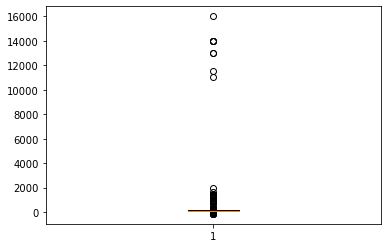

In [42]:
plt.boxplot(df['ap_hi'])

In [43]:
df.nsmallest(10, 'ap_hi')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
35040,63,0,66.0,130.07,-150,80,1,1,0,0,1,1
23988,50,1,64.0,163.14,-140,90,1,1,0,0,1,1
25240,40,0,66.0,110.23,-120,80,2,1,0,0,0,1
46627,64,0,63.0,130.07,-120,80,1,1,0,0,0,0
16021,60,0,63.0,198.42,-115,70,1,1,0,0,1,0
4607,41,1,65.0,171.96,-100,80,2,1,0,0,1,0
20536,42,1,60.0,119.05,-100,70,1,1,0,0,1,0
8757,46,0,64.0,138.89,1,2088,1,1,1,0,1,0
42334,51,1,67.0,176.37,1,1088,1,1,0,0,1,1
5382,58,1,64.0,152.12,7,80,1,1,0,0,1,0


In [44]:
df.drop(df[df['ap_hi'] < 60].index, inplace = True)

In [45]:
# checking to make sure that 60 is the min 
df['ap_hi'].min()

60

In [46]:
# checking to see the highest 20 values of ap_hi
df.nlargest(20, 'ap_hi')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
40852,47,1,67.0,154.32,16020,80,1,1,0,0,0,1
25464,43,0,67.0,165.35,14020,80,2,1,0,0,1,1
25519,58,1,67.0,156.53,14020,80,3,3,0,0,1,1
46912,46,0,71.0,171.96,14020,90,1,1,0,0,1,1
47253,54,1,63.0,143.30,14020,90,1,1,0,0,1,0
55459,50,1,60.0,167.55,13010,80,2,2,0,0,1,1
55847,63,1,63.0,231.49,13010,80,1,1,0,0,0,0
7763,57,1,69.0,176.37,11500,90,1,1,0,0,1,1
51438,51,0,66.0,143.30,11020,80,1,1,0,0,1,1
69370,40,1,67.0,163.14,2000,100,2,1,0,0,1,1


In [47]:
# how many values fall inbetween 300 and 2000
len(df[(df['ap_hi'] >= 300) & (df['ap_hi'] < 2000)])

30

In [48]:
# removing all the values higher than 300 
df.drop(df[df['ap_hi'] >= 300].index, inplace = True)

In [49]:
df['ap_hi'].max()

240

<br /> 

### Diastolic blood pressure (ap_lo) 
This feature measure "the force your heart exterts on the walls of your arteries in between beats." (mayoclinic) 

The following information is obtained from the sites listed below:   
1) https://www.mayoclinic.org/diseases-conditions/low-blood-pressure/symptoms-causes/syc-20355465  
2) https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/blood-pressure/art-20050982  
3) https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings  

The ranges for diastolic blood pressure are:    
1) __normal range: less than 80__   
2) __above normal: higher than 80__   
3) __really bad: higher than 120__   
4) __below normal: lower than 60__   
 

In [50]:
df['ap_lo'].min()

0

In [51]:
df['ap_lo'].max()

11000

In [52]:
# looking to see how many values are less than 40 for ap_lo
len(df[df['ap_lo'] < 40])

45

In [53]:
df.drop(df[df['ap_lo'] < 40].index, inplace = True)

In [54]:
df['ap_lo'].min()

40

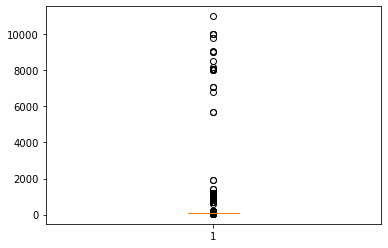

In [55]:
plt.boxplot(df['ap_lo'])
plt.show()

In [56]:
x = len(df[df['ap_lo'] > 300])
print('What % of values would I be removing from the dataset: ', round((x/len(df))*100, 2))

What % of values would I be removing from the dataset:  1.47


In [57]:
# since the % is lower than 2 and also the values don't make sense that are higher than 300 so dropping them 
df.drop(df[df['ap_lo'] > 300].index, inplace = True)

In [58]:
df.ap_lo.max()

190

<br /> 

### Cholesterol 

The data in this feature talks about the individuals cholesterol levels. What each level represents is: __1: normal, 2: above normal, 3: well above normal__   

Make sure that these are the only values in this feature

In [59]:
df['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

<br /> 

### Gluc
The data in this feature talks about the individuals glucose levels. What each level represents is: __1: normal, 2: above normal, 3: well above normal__    

Make sure that these are the only values in this feature

In [60]:
df['gluc'].unique()

array([1, 2, 3], dtype=int64)

<br /> 

### Smoke 
This feature tells us if the person smokes. This data is in binary (0 or 1). 0 for no and 1 for yes. 

In [61]:
df['smoke'].unique()

array([0, 1], dtype=int64)

<br /> 

### Alcohol 
This feature tells us if the person drinks alcohol. This data is in binary (0 or 1). 0 for no and 1 for yes. 

In [62]:
df['alco'].unique()

array([0, 1], dtype=int64)

<br /> 

### Active
This feature tells us if the person is active. This data is in binary (0 or 1). 0 for no and 1 for yes

In [63]:
df['active'].unique()

array([1, 0], dtype=int64)

<br /> 

### Cardiovasular Disease 
This is the class label and it tells us if the person has cardiovasular disease. This data is in binary (0 or 1). 0 for no and 1 for yes

In [64]:
df['cardio'].unique()

array([0, 1], dtype=int64)

In [65]:
# checking to make sure the classes aren't imbalanced
df['cardio'].value_counts()

1    32357
0    30348
Name: cardio, dtype: int64

<br /> 

## EXPLANATORY ANALYSIS

In [66]:
import seaborn as sns

In [67]:
# label function to be used for bar plots to show the value 
def add_value_labels(ax, spacing=2):
    for rect in ax.patches:
        # get the x and y location of the value
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # spacing between the bar and the value
        space = spacing
        # vertically align the label at bottom
        va = 'bottom'
        
    

        # format of the label 
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # the label 
            (x_value, y_value),         # where the place the label
            xytext=(0, space),          # how far from the bar the label should be 
            textcoords="offset points", 
            ha='center',                # make sure the label is centered
            va=va)                                        

In [68]:
# setting the style for the plots
sns.set(style="ticks")
# creating the palette to use 
palette = ['#30475e' ,'#f05454']

In [69]:
# create a function that plots
def create_plot(figsize, df, x, titleOfPlot, legendLoc=0, hue = 'cardio', row=0, col=0, titles = '',plot_type = 'singular'):
    if plot_type == 'singular':
        plt.figure(figsize = figsize) # create the size of the plot (figsize is a tuple)

        # create the plot
        if hue == 'none':
            plot = sns.countplot(x = x, hue = hue, data = df, palette = palette)
        else:
            plot = sns.countplot(x = x, hue = hue, data = df, palette = palette)
        plot.set_title(titleOfPlot, y = 1.01, fontsize = 14)
        plot.set_xlabel(None) 
        plot.set_ylabel(None) 
        plot.set_yticks([])

        # label the bars 
        add_value_labels(plot)

        # change legend location and title 
        plot.legend(loc = legendLoc, title = 'Cardiovasular Diease')

        plt.show()
    else:
        fig, ax = plt.subplots(row, col, figsize = figsize)
    
        fig.suptitle(supTitle, fontsize = 14)

        if row == 1 or col == 1: # if 1 dimenstion use a single for loop
            values = len(data)
            for i in range(values):
                if hue == 'none':
                    sns.countplot(x = x, data = data[i], palette = palette, ax = ax[i])
                else:
                    sns.countplot(x = x, hue = hue, data = data[i], palette = palette, ax = ax[i])
                ax[i].set_title(titles[i])
                ax[i].set_xlabel(None)
                ax[i].set_ylabel(None)
                ax[i].set_yticks([])

                if hue != 'none':
                    if (values-1) == i: 
                        ax[i].legend(title = 'Cardiovasular Disease')
                    else:
                        ax[i].legend('')

                add_value_labels(ax[i]) # add data label 
            
    plt.show()   

In [70]:
# use this df to create the plots 
df2 = df.copy()

 <br /> 
 
 ### Age (binned) Vs Cardio

This plot compares the age range's and see's which one had the most people with cardiovasular disease.  

The binning for age will be 26-30, 31-35, 36-40, 41-45, 46-50, 51-55, 56-60, 61-65

In [71]:
# viewing the minimum age
df['age'].min()

29

In [72]:
# viewing the max age 
df['age'].max()

64

In [73]:
# create the bin
cut_labels = ['26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']
cut_bins = [25,30,35,40,45,50,55,60,65]

df2['age'] = pd.cut(df2['age'], cut_bins, labels = cut_labels)


# replace o with no and 1 with yes for the cardio column 
df2['cardio'].replace({0:'No', 1: 'Yes'}, inplace = True)

In [74]:
# viewing to see if df2 looks like how I wanted it to look like 
df2['age'].head(15)

0     46-50
1     51-55
2     51-55
3     46-50
4     46-50
5     56-60
6     56-60
7     61-65
8     46-50
9     51-55
10    61-65
11    51-55
12    36-40
13    51-55
14    36-40
Name: age, dtype: category
Categories (8, object): [26-30 < 31-35 < 36-40 < 41-45 < 46-50 < 51-55 < 56-60 < 61-65]

In [75]:
# comparing the values of df2 and df to make sure the labels for the binning I created are accurate
df['age'].head(15)

0     50
1     55
2     51
3     48
4     47
5     60
6     60
7     61
8     48
9     54
10    61
11    51
12    40
13    54
14    39
Name: age, dtype: int32

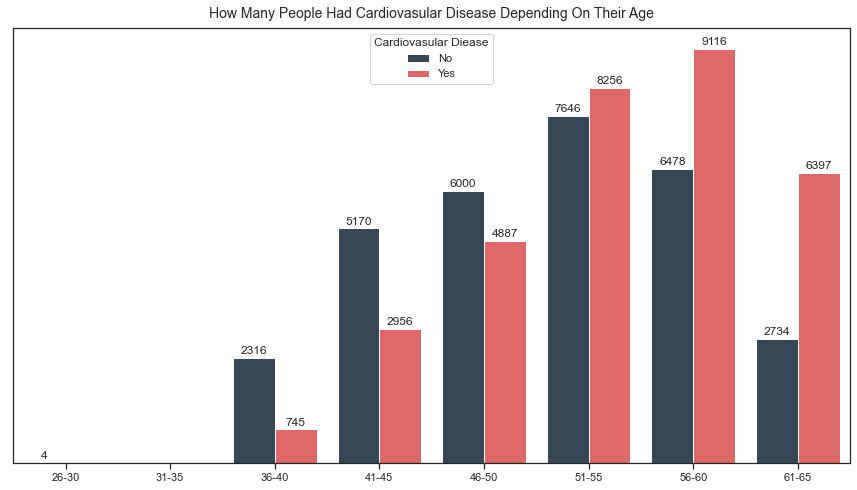

In [76]:
# creating the plot
figsize = (15,8)                                                                 # figsize
data = df2                                                                       # data
x = 'age'                                                                        # the x value
titleOfPlot = 'How Many People Had Cardiovasular Disease Depending On Their Age' # name of plot


# creating the plot
create_plot(figsize, data, x, titleOfPlot)

This plot shows that most of the data falls around the age range of 41 and up. Also The older you get the less likely you are to not have cardiovasular disease.   
__The percentages have been rounded__   
&nbsp;&nbsp;        26-30 (total: 4): _0% have cardiovascular disease_  
&nbsp;&nbsp;        31-35 (total: 0): _0% have cardiovascular disease_  
&nbsp;&nbsp;        36-40 (total: 3,323): _22.6% have cardiovascular disease_  
&nbsp;&nbsp;        41-45 (total: 8,725): _34.5% have cardiovascular disease_  
&nbsp;&nbsp;        46-50 (total: 11,971): _42% have cardiovascular disease_  
&nbsp;&nbsp;        51-55 (total: 17,560): _49.3% have cardiovascular disease_  
&nbsp;&nbsp;        56-60 (total: 16,960): _56.8% have cardiovascular disease_  
&nbsp;&nbsp;        61-65 (total: 9,500): _69.67% have cardiovascular disease_  


<br /> 

### Gender Vs. Cardio

Trying to see what gender had the most cases of cardiovasular disease and which had the least. 

In [77]:
# setting gender to be male and female instead of 0 and 1 so the plot is eaiser to read 
df2['gender'].replace({0: 'Male', 1: 'Female'}, inplace = True)

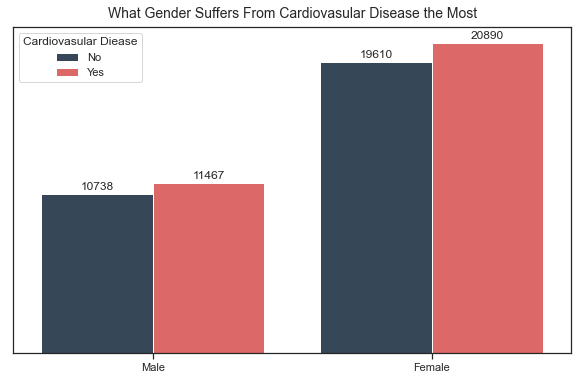

In [78]:
# creating the plot
figsize = (10,6)                                                                 # figsize
data = df2                                                                       # data
x = 'gender'                                                                     # the x value
titleOfPlot = 'What Gender Suffers From Cardiovasular Disease the Most'          # name of plot

# creating the plot
create_plot(figsize, data, x, titleOfPlot)

This plot tells me that the men and women in this dataset have almost equal numbers of those who do and don't have cardiovasular disease.   
__The percentages have been rounded__   
&nbsp;&nbsp;           Male (total: 23,397): _50.13% have cardiovascular disease_  
&nbsp;&nbsp;           Female (total: 44,645): _49.2% have cardiovascular disease_

<br /> 

### Height(binned) Vs Cardio

This plot will compare the height of those people who had cardiovasular disease and those who didn't.

In [79]:
#viewing how many values height has so I can figure out how many bins to create (9)
df2['height'].unique()

array([66., 61., 65., 67., 59., 62., 70., 68., 71., 64., 60., 63., 69.,
       74., 58., 73., 72., 56., 57., 77., 78., 76., 75., 81.])

In [80]:
df2['height'].max()

81.0

In [81]:
df2['height'].min()

56.0

In [82]:
# creating the bins 
cut_label = ["4ft'8 - 4ft'9", "4ft'10 - 5ft", "5ft'1 - 5ft'3", "5ft'4 -5ft'6", "5ft'7 - 5ft'9", 
             "5ft'10 - 6ft", "6ft'1 - 6ft'3", "6ft'4 - 6ft'6", "6ft'7+"]
cut_bins = [55, 57, 60, 63, 66, 69, 72, 75, 78, 81]

df2['height'] = pd.cut(df2['height'], bins = cut_bins, labels= cut_label)

In [83]:
# seeing if the binning labels look the way I wanted 
df2['height'].head(10)

0     5ft'4 -5ft'6
1    5ft'1 - 5ft'3
2     5ft'4 -5ft'6
3    5ft'7 - 5ft'9
4    5ft'1 - 5ft'3
5     4ft'10 - 5ft
6    5ft'1 - 5ft'3
7     5ft'10 - 6ft
8    5ft'1 - 5ft'3
9     5ft'4 -5ft'6
Name: height, dtype: category
Categories (9, object): [4ft'8 - 4ft'9 < 4ft'10 - 5ft < 5ft'1 - 5ft'3 < 5ft'4 -5ft'6 ... 5ft'10 - 6ft < 6ft'1 - 6ft'3 < 6ft'4 - 6ft'6 < 6ft'7+]

In [84]:
# comparing with df2 height to make sure the binning labels are correct 
df['height'].head(10)

0    66.0
1    61.0
2    65.0
3    67.0
4    61.0
5    59.0
6    62.0
7    70.0
8    62.0
9    65.0
Name: height, dtype: float64

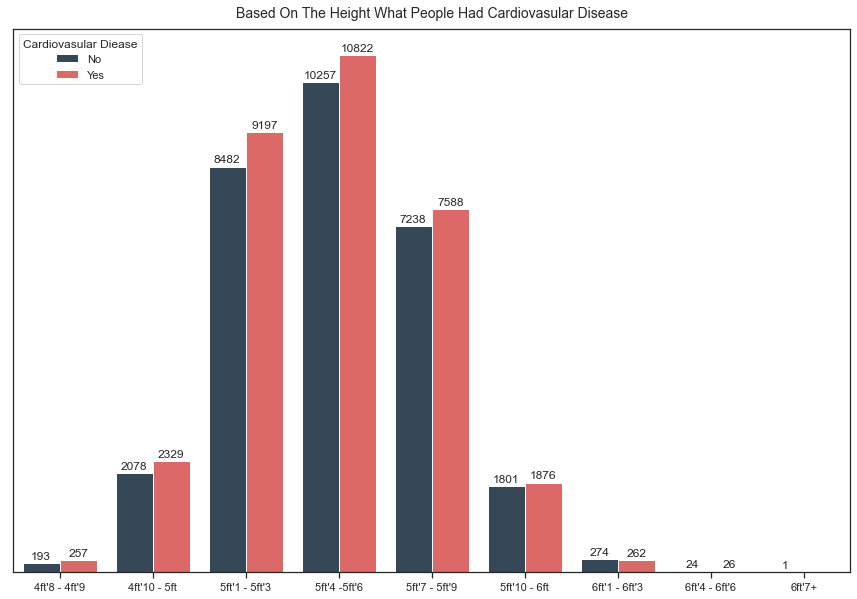

In [85]:
# creating the plot
figsize = (15,10)                                                                # figsize
data = df2                                                                       # data
x = 'height'                                                                     # the x value
titleOfPlot = 'Based On The Height What People Had Cardiovasular Disease'        # name of plot

# creating the plot
create_plot(figsize, data, x, titleOfPlot)

The height of most people in this dataset fell in between 5.1 and 5.9.    
__The percentages have been rounded__   
&nbsp;&nbsp;         4ft'8 - 4ft'9 (total: 452): _57.3% have cardiovascular disease_   
&nbsp;&nbsp;         4ft'10 - 5ft (total: 4,473): _52.38% have cardiovascular disease_   
&nbsp;&nbsp;         5ft'1 - 5ft'3 (total: 19,135): _50% have cardiovascular disease_   
&nbsp;&nbsp;         5ft'4 - 5ft'6 (total: 23,559): _48.60% have cardiovascular disease_   
&nbsp;&nbsp;         5ft'7 - 5ft'9 (total: 16,100): _48.97% have cardiovascular disease_   
&nbsp;&nbsp;         5ft'10 - 6ft (total: 3,735): _50.60% have cardiovascular disease_     
&nbsp;&nbsp;         6ft'1 - 6ft'3 (total: 537): _48.79% have cardiovascular disease_     
&nbsp;&nbsp;         6ft'4 - 6ft'6 (total: 50): _52% have cardiovascular disease_    
&nbsp;&nbsp;         6ft'7+ (total: 1): _0% have cardiovascular disease_   


<br /> 

### Weight(binned) Vs Cardio

This plot will compare the weights of those people who had cardiovasular disease to those who didn't. Also the plot will be broken up to represent the different genders in the dataset to make it easier to view the data. 

In [86]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,0,66.0,136.69,110,80,1,1,0,0,1,0
1,55,1,61.0,187.39,140,90,3,1,0,0,1,1
2,51,1,65.0,141.10,130,70,3,1,0,0,0,1
3,48,0,67.0,180.78,150,100,1,1,0,0,1,1
4,47,1,61.0,123.46,100,60,1,1,0,0,0,0
5,60,1,59.0,147.71,120,80,2,2,0,0,0,0
6,60,1,62.0,205.03,130,80,3,1,0,0,1,0
7,61,0,70.0,209.44,130,90,3,3,0,0,1,1
8,48,1,62.0,156.53,110,70,1,1,0,0,1,0
9,54,1,65.0,149.91,110,60,1,1,0,0,0,0


In [87]:
# creating a dataframe that contains the information of all the females
female_df = df[df['gender'] == 1].copy()
len(female_df['weight'].unique()) # viewing how many unique values exist for the weights in this dataset

136

In [88]:
# looking at the min weight
female_df['weight'].min()

63.93

In [89]:
# looking at the max weight
female_df['weight'].max()

440.92

In [90]:
# female bins <=100, (100-200], (200-300], (300,400], >400
f_bins = [60,100,200,300,400,500]
f_labels = ['<=100', '(100-200]', '(200-300]', '(300,400]', '>400']

female_df['weight'] = pd.cut(female_df['weight'], bins = f_bins, labels = f_labels)

In [91]:
# viewing to make sure my binning worked
female_df['weight'].head()

1    (100-200]
2    (100-200]
4    (100-200]
5    (100-200]
6    (200-300]
Name: weight, dtype: category
Categories (5, object): [<=100 < (100-200] < (200-300] < (300,400] < >400]

In [92]:
# comparing this to the above statement to see if the labels are correct 
df['weight'].head()

0    136.69
1    187.39
2    141.10
3    180.78
4    123.46
Name: weight, dtype: float64

In [93]:
# creating a dataframe that contains only the males information 
male_df = df[(df['gender'] == 0)].copy()
len(male_df['weight'].unique())

123

In [94]:
# viewing the minimum weight
male_df['weight'].min()

90.39

In [95]:
# viewing the max weight
male_df['weight'].max()

440.92

In [96]:
# male bins <=100, (100-200], (200-300], (300,400], >400
m_bins = [90,100,200,300,400,500]
m_labels = ['<=100', '(100-200]', '(200-300]', '(300,400]', '>400']

male_df['weight'] = pd.cut(male_df['weight'], bins = f_bins, labels = f_labels)

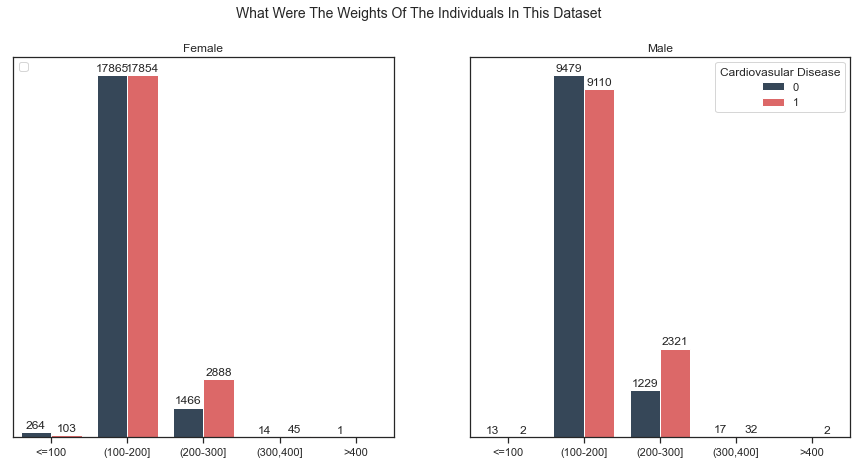

In [97]:
# creating the plot
figsize = (15,7)                                                       # figure size
row = 1                                                                # how many rows
col = 2                                                                # how many columns
data = [female_df, male_df]                                            # the data that we are plotting
x = 'weight'                                                           # the x value 
supTitle = 'What Were The Weights Of The Individuals In This Dataset'  # suptitle
titles = ['Female', 'Male']    

create_plot(figsize, data, x, supTitle, 0,'cardio', row, col, titles,'subplots')

The plot above shows the weights of those who have cardiovasslar disease and those who don't.   

__The percentages have been rounded__  
__Female:__  
It seems that most of the females in the dataset fall in the range of 100-200 pounds. Also the females that do fall in the 100-200 pounds most of them don't have cardiovasular diease, but the bars aren't too far apart from one another.   
&nbsp;&nbsp;        <= 100 (total: 367): _28% have cardiovascular disease_  
&nbsp;&nbsp;        (100-200] (total: 39,838): _47.5% have cardiovascular disease_   
&nbsp;&nbsp;        (200,300] (total: 4,380): _66.3% have cardiovascular disease_  
&nbsp;&nbsp;        (300-400] (total: 59): _76.27% have cardiovascular disease_  
&nbsp;&nbsp;        greater than 400 (total: 1): _0% have cardiovascular disease_  

__Male:__ 
Just like the females most of the men in the dataset fall in the range of 100-200 pounds. Also another similarity between the two subplots is that for the 200-300 range the number that have cardiovasular diease is greater than those who don't.    
&nbsp;&nbsp;        <= 100 (total: 15): _13.3% have cardiovascular disease_  
&nbsp;&nbsp;        (100-200] (total: 19,765): _47.38% have cardiovascular disease_   
&nbsp;&nbsp;        (200,300] (total: 3,566): _65.3% have cardiovascular disease_  
&nbsp;&nbsp;        (300-400] (total: 49): _65.3% have cardiovascular disease_  
&nbsp;&nbsp;        greater than 400 (total: 2): _100% have cardiovascular disease_  


<br />

####  How many individuals are over weight, under weight, normal weight 
I am creating a column that tells you the persons bmi and seeing based on their bmi levels how many males have cardiovasular disease and the same for females.    

Formula for bmi:  
mass (in kg) / height^2 (in meters)  

Feet to meters:  
ft/3.2808   

Pounds to Kg: 
pound / 2.20462262185

In [98]:
# reassignming female_df and male_df because can't do calculations on categorical values that we created through binning to 
# create the above plot 
female_df = df[df['gender'] == 1].copy()
male_df = df[df['gender'] == 0].copy()

In [99]:
# function to calculate bmi 
def cal_bmi(weight,height):
    # calculate the height^2 in meters
    height_meters = height/39.37
    height_squared = height_meters * height_meters
    # calculate the weight in kg
    weight_kg = weight/ 2.20462262185
    # calculate the bmi
    bmi = weight_kg / height_squared
    
    # return the bmi list 
    return bmi

In [100]:
def bin_bmi(bmi):
    result = []
    # for loop for the bmi list 
    for value in bmi:
        # if below 18.5 then underweight 
        if (value < 18.5): 
            result.append('underweight')
        # if 18.5 - 24.9 then normal 
        elif value >= 18.5 and value <= 24.9:
            result.append('normal')
        # if 25.0-29.9 then overweight 
        elif value >= 25.0 and value <= 29.9: 
            result.append('overweight')
        # if over 30 then obese
        else:
            result.append('obese')
    
    return result

In [101]:
# inserting the bmi feature 
female_df.insert(4, 'bmi', bin_bmi(cal_bmi(female_df['weight'], female_df['height'])))
male_df.insert(4, 'bmi', bin_bmi(cal_bmi(male_df['weight'], male_df['height'])))

In [102]:
# checking to make sure the insertion occurred corrected 
female_df.head(10)

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,55,1,61.0,187.39,obese,140,90,3,1,0,0,1,1
2,51,1,65.0,141.10,normal,130,70,3,1,0,0,0,1
4,47,1,61.0,123.46,normal,100,60,1,1,0,0,0,0
5,60,1,59.0,147.71,overweight,120,80,2,2,0,0,0,0
6,60,1,62.0,205.03,obese,130,80,3,1,0,0,1,0
8,48,1,62.0,156.53,overweight,110,70,1,1,0,0,1,0
9,54,1,65.0,149.91,obese,110,60,1,1,0,0,0,0
10,61,1,67.0,176.37,overweight,120,80,1,1,0,0,1,0
13,54,1,62.0,171.96,obese,110,70,1,1,0,0,1,0
16,58,1,67.0,165.35,overweight,130,70,1,1,0,0,0,0


In [103]:
# checking to make sure the insertion occurred corrected 
male_df.head(10)

,age,gender,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,0,66.0,136.69,normal,110,80,1,1,0,0,1,0
3,48,0,67.0,180.78,overweight,150,100,1,1,0,0,1,1
7,61,0,70.0,209.44,obese,130,90,3,3,0,0,1,1
11,51,0,68.0,132.28,normal,120,80,1,1,0,0,1,0
12,40,0,65.0,132.28,normal,120,80,1,1,0,0,0,0
14,39,0,71.0,209.44,overweight,130,90,1,1,1,1,1,0
15,45,0,68.0,246.92,obese,120,80,1,1,0,0,0,1
19,59,0,64.0,123.46,normal,120,70,1,1,1,0,1,0
20,54,0,64.0,182.98,obese,120,80,1,1,0,0,1,0
28,39,0,65.0,145.51,normal,120,80,1,1,0,0,1,0


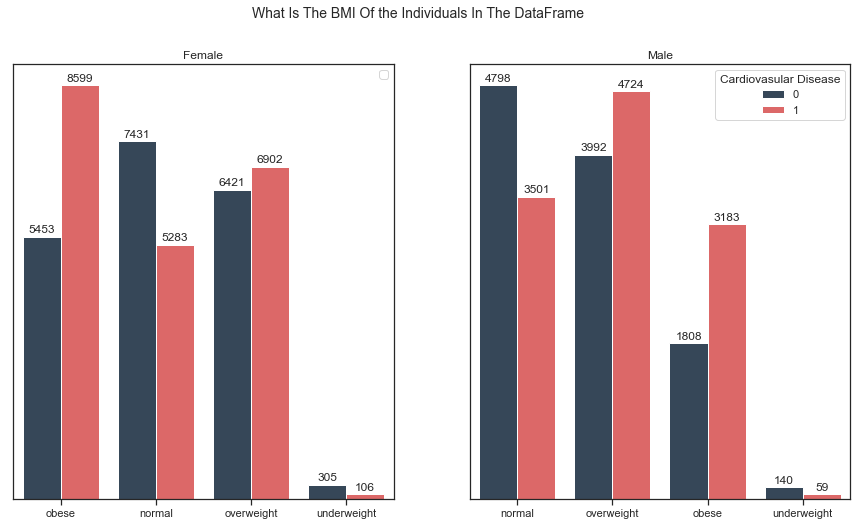

In [104]:
# creating the plot
figsize = (15,8)                                                       # figure size
x = 'bmi'                                                              # the x value 
supTitle = 'What Is The BMI Of the Individuals In The DataFrame'       # suptitle
row = 1                                                                # how many rows
col = 2                                                                # how many columns
data = [female_df, male_df]                                            # the data that we are plotting
titles = ['Female', 'Male']                                            # title of each subplot

create_plot(figsize, data, x, supTitle, 0,'cardio', row, col, titles,'subplots')

The plot above compares the bmi category that those who had cardiovascular disease and those who didn't fall under.

__The percentages have been rounded__   
__Female:__   
It seems that the majority of cardiovascular disease female individuals fall under obese and overweight. But the people with a normal bmi and have cardiovascular disease are much higher than I anticipated.   
&nbsp;&nbsp;     Obese (total: 14,593): _60% have cardiovascular disease_  
&nbsp;&nbsp;     Overweight (total: 14,685): _49.4% have cardiovascular disease_     
&nbsp;&nbsp;     Normal (total: 14,955): _39% have cardiovascular disease_  
&nbsp;&nbsp;     UnderWeight (total: 412): _25.7% have cardiovascular disease_     

__Male:__   
For males it seems that the majority of people with cardiovascular disease are those who are overweight. Interestingly enough the males with normal and obese bmi have the almost the same amount of people with cardiovascular diease. However if you look at the total number of males who are obese compared to those who are normal weight you will see there are more that are normal weight in this dataset.     
&nbsp;&nbsp;     Obese (total: 5,060): _63.3% have cardiovascular disease_    
&nbsp;&nbsp;     Overweight (total: 9,109): _52.98% have cardiovascular disease_       
&nbsp;&nbsp;     Normal (total: 9,029): _40% have cardiovascular disease_      
&nbsp;&nbsp;     UnderWeight (total: 199): _25.6% have cardiovascular disease_   


__Something interesting is that the percentages of those who have cardiovascular disease for each of the different bmi's are very close for males and females.__

<br/> 

### Adding the bmi column 

Adding in the bmi column into the dataframe because it will be helpful when doing prediction when the models are prediction 

In [105]:
df.insert(3, "bmi", round(cal_bmi(df['weight'], df['height']), 2))

In [106]:
df.head()

,age,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,0,66.0,22.06,136.69,110,80,1,1,0,0,1,0
1,55,1,61.0,35.41,187.39,140,90,3,1,0,0,1,1
2,51,1,65.0,23.48,141.10,130,70,3,1,0,0,0,1
3,48,0,67.0,28.31,180.78,150,100,1,1,0,0,1,1
4,47,1,61.0,23.33,123.46,100,60,1,1,0,0,0,0


<br /> 

### Ap_hi Vs. Cardio
This plot will compare the number of individuals with cardiovascular disease based on the range their syslotic levels fall under

In [107]:
# create bins 
# below (50-89) 
# normal (90-119)
# above (120-179)
# horrible (180-300)

cut_bins = [50,89,119,179,300]
cut_labels = ['below', 'normal', 'above', 'horrible']

df2['ap_hi'] = pd.cut(df2['ap_hi'], bins = cut_bins, labels = cut_labels)

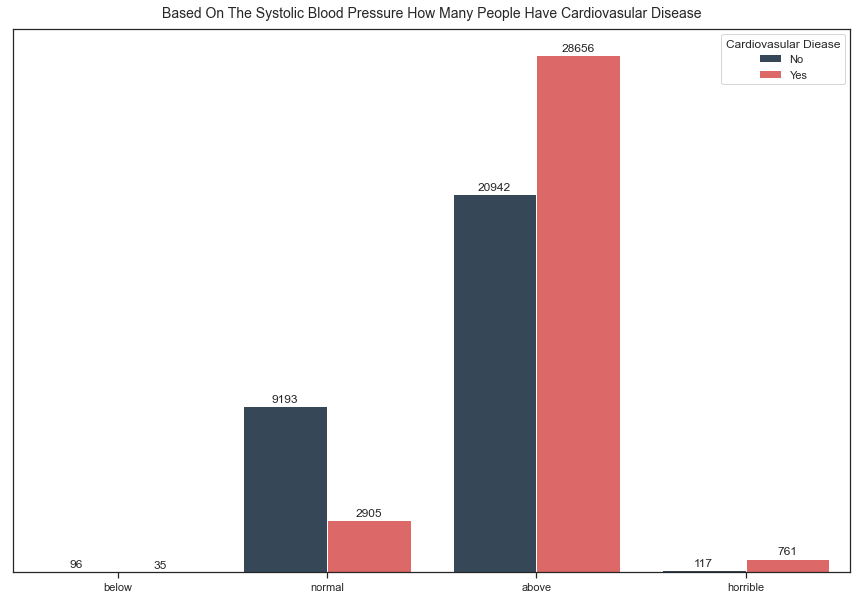

In [108]:
# creating the plot
figsize = (15,10)                                                                # figsize
data = df2                                                                       # data
x = 'ap_hi'                                                                     # the x value
titleOfPlot = 'Based On The Systolic Blood Pressure How Many People Have Cardiovasular Disease' # name of plot

# creating the plot
create_plot(figsize, data, x, titleOfPlot)

The above plot shows the relationship between the different systolic blood pressures and cardiovasular disease in the dataset. What we can see is that most of the people in the dataset had systolic blood pressures that were above the normal range.    

__The percentages have been rounded__   
&nbsp;&nbsp;      below (total: 130): _26.92% have cardiovascular disease_  
&nbsp;&nbsp;      normal (total: 12,525): _23.36% have cardiovascular disease_  
&nbsp;&nbsp;      above (total: 54,350): _55% have cardiovascular disease_  
&nbsp;&nbsp;      horrible (total: 876): _89.3% have cardiovascular disease_  

<br /> 

### Ap_lo Vs. Cardio

In [109]:
# create bins 
# below (40-59)
# normal (60-79)
# above (80-119)
# horrible (120-200)

cut_bins = [40,59,79,119,200]
cut_labels = ['below', 'normal', 'above', 'horrible']

df2['ap_lo'] =pd.cut(df2['ap_lo'], bins = cut_bins, labels = cut_labels)

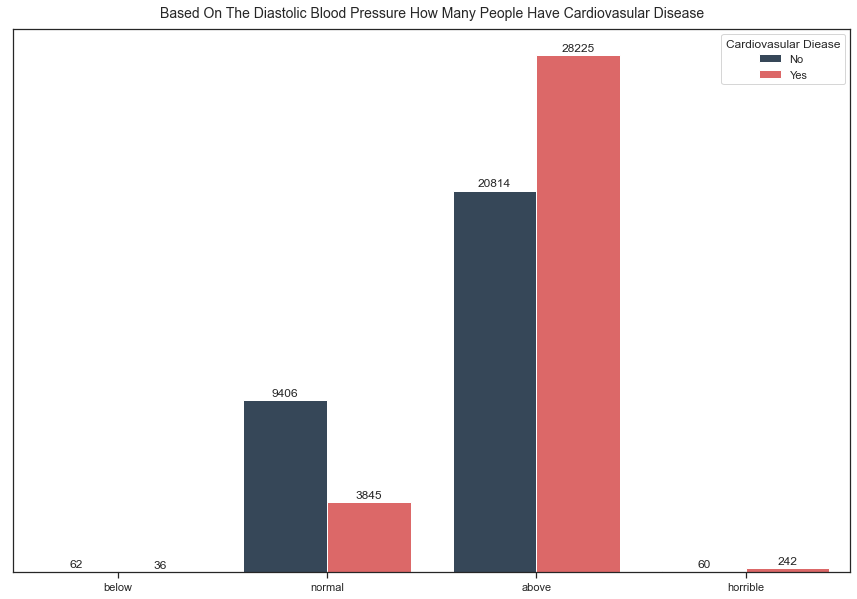

In [110]:
# creating the plot
figsize = (15,10)                                                                # figsize
data = df2                                                                       # data
x = 'ap_lo'                                                                     # the x value
titleOfPlot = 'Based On The Diastolic Blood Pressure How Many People Have Cardiovasular Disease' # name of plot

# creating the plot
create_plot(figsize, data, x, titleOfPlot)

The above plot shows the relationship between the diastolic blood pressure levels and cardiovasular disease. As we can see most of the people in this dataset have an above normal diastolic blood pressure.   

__The percentages have been rounded__   
&nbsp;&nbsp;      below (total: 98): _36.7% have cardiovascular disease_  
&nbsp;&nbsp;      normal (total: 13,692): _28.27% have cardiovascular disease_  
&nbsp;&nbsp;      above (total: 53,774): _54.77% have cardiovascular disease_  
&nbsp;&nbsp;      horrible (total: 302): _80% have cardiovascular disease_   

__Something interesting is that for both diastolic and systolic blood pressure the above normal range is the biggest and for both the percentage of people in that group that have cardiovascular disease is around 55%__

<br /> 

### Cholesterol Vs. Cardio

In [111]:
# replace values in cholesterol 
# normal (level 1) 
# above normal (Level 2)
# well above normal (level 3)
df2['cholesterol'].replace({1: 'Normal', 2: 'Above Normal', 3 : 'Well Above Normal'}, inplace = True)

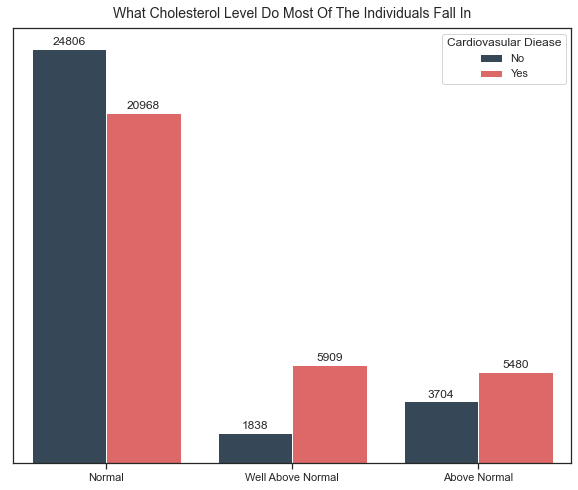

In [112]:
figsize = (10,8)                                                                # figsize
data = df2                                                                       # data
x = 'cholesterol'                                                                # the x value
titleOfPlot = 'What Cholesterol Level Do Most Of The Individuals Fall In'        # name of plot


# creating the plot
create_plot(figsize, data, x, titleOfPlot)

This plot shows the different cholesterol levels and if those individuals have cardiovasular disease or not. From this we can tell that most people in this dataset fall in level 1 for cholesterol levels which means they have a normal level.   

__The percentages have been rounded__  
&nbsp;&nbsp;           Normal (total: 50,883): _43.58% have cardiovascular disease_   
&nbsp;&nbsp;           Above (total: 9,203): _59.6% have cardiovascular disease_   
&nbsp;&nbsp;           Well Above (total: 7,795): _76.28% have cardiovascular disease_   

<br /> 

### Gluc Vs. Cardio

In [113]:
# replace values in gluc
# normal (level 1) 
# above normal (Level 2)
# well above normal (level 3)
df2['gluc'].replace({1: 'Normal', 2: 'Above Normal', 3 : 'Well Above Normal'}, inplace = True)

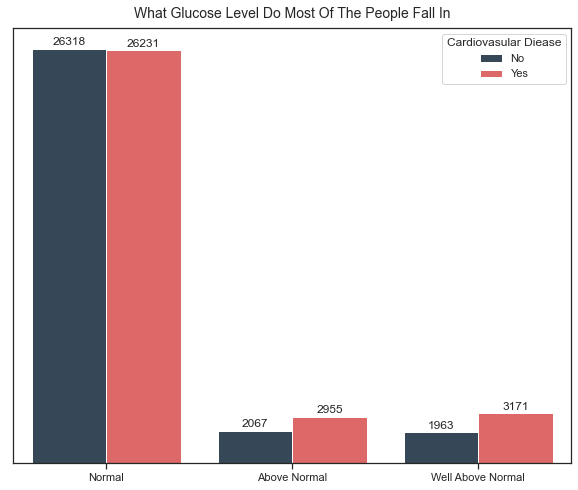

In [114]:
figsize = (10,8)                                                                 # figsize
data = df2                                                                       # data
x = 'gluc'                                                                       # the x value
titleOfPlot = 'What Glucose Level Do Most Of The People Fall In'                 # name of plot


# creating the plot
create_plot(figsize, data, x, titleOfPlot)

Similar to cholesterol mostly people in this dataset have normal glucose levels. For those who have normal glucose levels about 48% of the people have cardiovascular disease.   

__The percentages have been rounded__   
&nbsp;&nbsp;           Normal (total: 57,691): _47.6% have cardiovascular disease_   
&nbsp;&nbsp;           Above Normal (total: 5,014): _58.74% have cardiovascular disease_   
&nbsp;&nbsp;           Well Above Normal (total: 5,176): _61.77% have cardiovascular disease_  

<br /> 

### Smoking Vs. Cardio

In [115]:
# replace values in smoke
df2['smoke'].replace({0: 'No', 1: 'Yes'}, inplace = True)

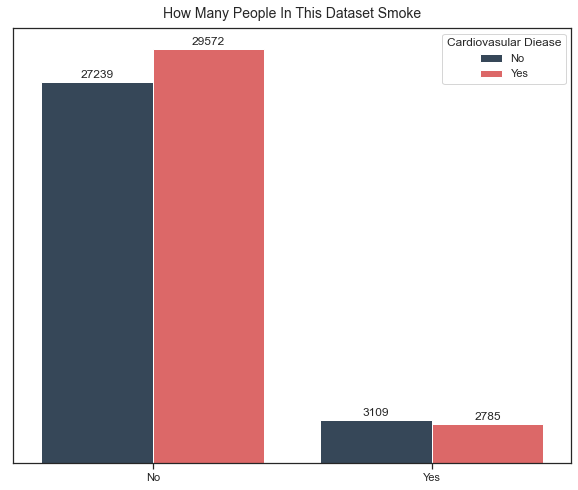

In [116]:
figsize = (10,8)                                                                 # figsize
data = df2                                                                       # data
x = 'smoke'                                                                      # the x value
titleOfPlot = 'How Many People In This Dataset Smoke'                            # name of plot


# creating the plot
create_plot(figsize, data, x, titleOfPlot)

This plot shows the relationship between smoking and cardivasular disease. It seems that most of the people in this dataset do not smoke.    

__The percentages have been rounded__  
&nbsp;&nbsp;           No (total: 61,940): _49.76% have cardiovascular disease_  
&nbsp;&nbsp;           Yes (total: 5,941): _46.89% have cardiovascular disease_  

<br /> 

### Alcohol Vs. Cardio

In [117]:
# replace values in smoke
df2['alco'].replace({0: 'No', 1: 'Yes'}, inplace = True)

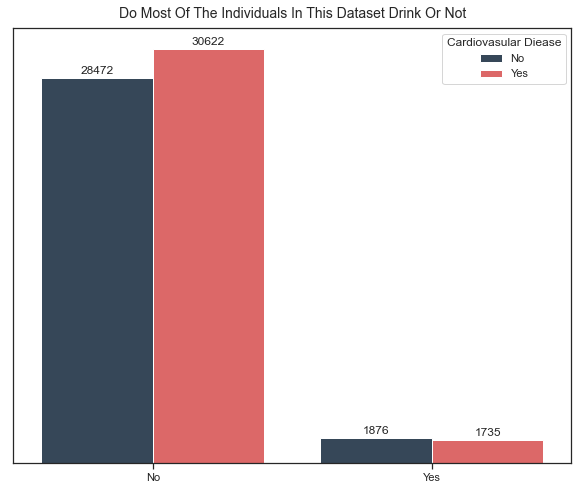

In [118]:
figsize = (10,8)                                                                 # figsize
data = df2                                                                       # data
x = 'alco'                                                                       # the x value
titleOfPlot = 'Do Most Of The Individuals In This Dataset Drink Or Not'          # name of plot


# creating the plot
create_plot(figsize, data, x, titleOfPlot)

This plot shows the relationship between alcohol and cardiovascular disease. Most of the people in this dataset do not drink.   

__The percentages have been rounded__  
&nbsp;&nbsp;           No (total: 64,254): _49.6% have cardiovascular disease_  
&nbsp;&nbsp;           Yes (total: 3,627): _47.8% have cardiovascular disease_  

<br /> 

### Active Vs. Cardio

In [119]:
# replace values in smoke
df2['active'].replace({0: 'No', 1: 'Yes'}, inplace = True)

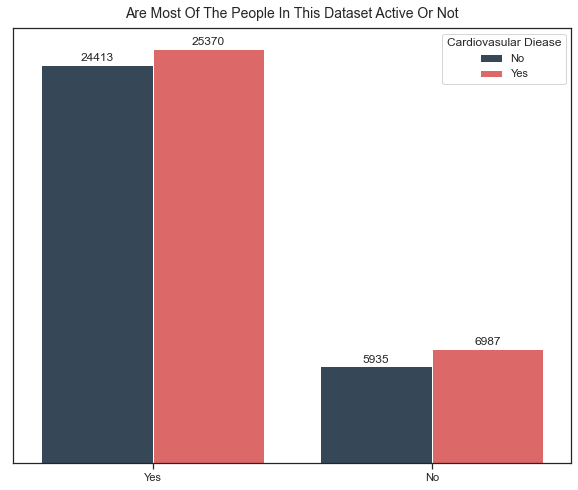

In [120]:
figsize = (10,8)                                                                 # figsize
data = df2                                                                       # data
x = 'active'                                                                     # the x value
titleOfPlot = 'Are Most Of The People In This Dataset Active Or Not'             # name of plot

# creating the plot
create_plot(figsize, data, x, titleOfPlot)

This plot shows the relationship between active and cardiovasular disease. Most of the people in this dataset are active.  

__The percentages have been rounded__  
&nbsp;&nbsp;           No (total: 13,347): _53.3% have cardiovascular disease_  
&nbsp;&nbsp;           Yes (total: 54,534): _48.58% have cardiovascular disease_  

<br />

#### Relationship Between Smoking/Drinking and Cardiovasular Disease
There are two subplots one that shows people who drink and smoke and another subplot that shows people who do neither of those things and shows how many of them had cardiovasular disease and how many didn't. 

In [121]:
# create subplots of people who dont smoke/drink/workout and people who do all of those things and see the 
# relationship between the values and cardiovasular disease
not_smoke_drink = df2[(df2['smoke'] == 'No') & (df2['alco'] == 'No')]
smoke_drink = df2[(df2['smoke'] == 'Yes') & (df2['alco'] == 'Yes')]

In [122]:
# checking to make sure smoke and alco both contain No
not_smoke_drink.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,46-50,Male,5ft'4 -5ft'6,136.69,normal,above,Normal,Normal,No,No,Yes,No
1,51-55,Female,5ft'1 - 5ft'3,187.39,above,above,Well Above Normal,Normal,No,No,Yes,Yes
2,51-55,Female,5ft'4 -5ft'6,141.10,above,normal,Well Above Normal,Normal,No,No,No,Yes
3,46-50,Male,5ft'7 - 5ft'9,180.78,above,above,Normal,Normal,No,No,Yes,Yes
4,46-50,Female,5ft'1 - 5ft'3,123.46,normal,normal,Normal,Normal,No,No,No,No


In [123]:
# checking to make sure smoke and alco both contain Yes
smoke_drink.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
14,36-40,Male,5ft'10 - 6ft,209.44,above,above,Normal,Normal,Yes,Yes,Yes,No
107,36-40,Male,5ft'4 -5ft'6,105.82,normal,normal,Normal,Above Normal,Yes,Yes,Yes,Yes
134,56-60,Male,5ft'7 - 5ft'9,198.42,above,above,Normal,Normal,Yes,Yes,No,Yes
177,56-60,Male,5ft'7 - 5ft'9,152.12,above,above,Normal,Normal,Yes,Yes,Yes,No
230,61-65,Male,5ft'7 - 5ft'9,165.35,horrible,above,Well Above Normal,Normal,Yes,Yes,Yes,Yes


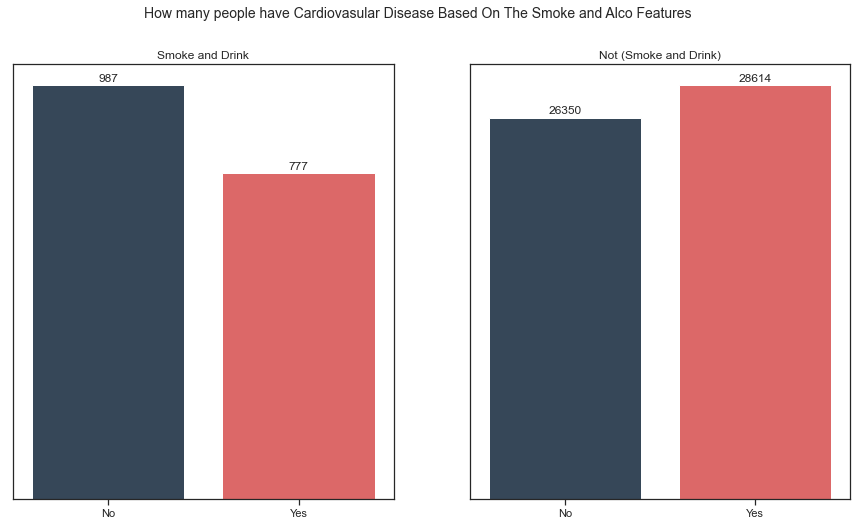

In [124]:
# creating the plot
figsize = (15,8)                                                       # figure size
x = 'cardio'                                                           # the x value 
supTitle = 'How many people have Cardiovasular Disease Based On The Smoke and Alco Features'
row = 1                                                                # how many rows
col = 2                                                                # how many columns
data = [smoke_drink, not_smoke_drink]                                  # the data that we are plotting
titles = ['Smoke and Drink', 'Not (Smoke and Drink)']                  # title of subplots    
hue = 'none'                                                           # no hue 

create_plot(figsize, data, x, supTitle,hue = 'none', row = row, col = col, titles = titles,plot_type = 'subplots')

The above plot compares people who smoke and drink and have/don't have cardiovasular diease to those people who do none of those things.   

__The percentages have been rounded__  
&nbsp;&nbsp;           Smoke and Drink(total: 1,778): _43.76% have cardiovascular disease_    
&nbsp;&nbsp;           Not(Smoke and Drink) (total: 60,091): _49.7% have cardiovascular disease_        

<br /> 


## CLUSTERING

Creating 3 clustering using KMeans. I want to see how it splits the data and how many people in the different clusters have cardiovascular disease and how many don't. Also to standardize the data I am going to use the Z score (StandardScaler). 

In [125]:
# store the cardio column  
cardio = df['cardio']

# removing the class label 
df.drop(columns = 'cardio', inplace = True)

In [126]:
# checking to make sure the class label was dropped 
df.head()

,age,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,50,0,66.0,22.06,136.69,110,80,1,1,0,0,1
1,55,1,61.0,35.41,187.39,140,90,3,1,0,0,1
2,51,1,65.0,23.48,141.10,130,70,3,1,0,0,0
3,48,0,67.0,28.31,180.78,150,100,1,1,0,0,1
4,47,1,61.0,23.33,123.46,100,60,1,1,0,0,0


In [127]:
# import required libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 

In [128]:
# scaling the data for cluster_df
scaled = StandardScaler().fit_transform(df)

In [129]:
# create a dataframe that contains the scaled data
standardized_df = pd.DataFrame(scaled, columns = df.columns)

In [130]:
# seeing how the zscore standardization looks like 
standardized_df.head()

,age,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.421007,-1.350523,0.372926,-1.044044,-0.872127,-0.993846,-0.154806,-0.564671,-0.413269,-0.322099,-0.247196,0.509477
1,0.312741,0.740454,-1.206649,1.470403,0.705083,0.743327,0.845256,2.304904,-0.413269,-0.322099,-0.247196,0.509477
2,-0.274257,0.740454,0.057011,-0.776590,-0.734938,0.164269,-1.154868,2.304904,-0.413269,-0.322099,-0.247196,-1.962798
3,-0.714506,-1.350523,0.688841,0.133131,0.499454,1.322385,1.845318,-0.564671,-0.413269,-0.322099,-0.247196,0.509477
4,-0.861255,0.740454,-1.206649,-0.804842,-1.283695,-1.572904,-2.154929,-0.564671,-0.413269,-0.322099,-0.247196,-1.962798


In [131]:
# using kmeans to cluster the data into 3 clusters and storing the predictions 
y_predicted = KMeans(n_clusters = 3, max_iter = 300, random_state = 0).fit_predict(standardized_df)

In [132]:
# putting the predictions back into the orginal dataframe as well as putting the actaully class label back
df['cardio'] = cardio
df['cluster_grouping'] = y_predicted

In [133]:
df.head(10)

,age,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cluster_grouping
0,50,0,66.0,22.06,136.69,110,80,1,1,0,0,1,0,0
1,55,1,61.0,35.41,187.39,140,90,3,1,0,0,1,1,1
2,51,1,65.0,23.48,141.10,130,70,3,1,0,0,0,1,0
3,48,0,67.0,28.31,180.78,150,100,1,1,0,0,1,1,1
4,47,1,61.0,23.33,123.46,100,60,1,1,0,0,0,0,0
5,60,1,59.0,29.83,147.71,120,80,2,2,0,0,0,0,1
6,60,1,62.0,37.50,205.03,130,80,3,1,0,0,1,0,1
7,61,0,70.0,30.05,209.44,130,90,3,3,0,0,1,1,1
8,48,1,62.0,28.63,156.53,110,70,1,1,0,0,1,0,0
9,54,1,65.0,24.95,149.91,110,60,1,1,0,0,0,0,0


In [134]:
# seeing how many % of the data in cluster 0 have cardiovasular disease and how many don't 
print('What percentage of the data went into CLUSTER 0 out of the entire dataframe: ', 
      len(df[df['cluster_grouping'] == 0]) / len(df) * 100)

print('What percentage in CLUSTER 0 have cardiovascular disease out of the entire dataframe: ',
      len(df[(df['cluster_grouping'] == 0) & (df['cardio'] == 1)])/len(df) * 100)

print("What percentage in CLUSTER 0 don't have cardiovascular disease out of the entire dataframe: ",
      len(df[(df['cluster_grouping'] == 0) & (df['cardio'] == 0)])/len(df) * 100)

What percentage of the data went into CLUSTER 0 out of the entire dataframe:  55.62395343274061
What percentage in CLUSTER 0 have cardiovascular disease out of the entire dataframe:  21.841958376524996
What percentage in CLUSTER 0 don't have cardiovascular disease out of the entire dataframe:  33.781995056215614


In [135]:
# viewing the mean, std, min, max, 25%, and etc of other features to see what they are inside of cluster 0  
df[df['cluster_grouping'] == 0].describe()

,age,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cluster_grouping
count,34879.000000,34879.000000,34879.000000,34879.000000,34879.000000,34879.000000,34879.000000,34879.000000,34879.000000,34879.000000,34879.000000,34879.00000,34879.000000,34879.0
mean,51.665501,0.705295,64.685312,25.192851,149.906049,119.650191,77.544912,1.149030,1.095158,0.001118,0.013274,0.77981,0.392672,0.0
std,6.866107,0.455916,3.054243,3.381001,22.025058,12.381497,8.017387,0.419141,0.365885,0.033421,0.114449,0.41438,0.488352,0.0
min,29.000000,0.000000,56.000000,10.010000,63.930000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.0
25%,46.000000,0.000000,63.000000,23.040000,134.480000,110.000000,70.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.0
50%,52.000000,1.000000,65.000000,24.860000,149.910000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.0
75%,57.000000,1.000000,67.000000,27.250000,165.350000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000,0.0
max,64.000000,1.000000,78.000000,44.520000,251.330000,195.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.00000,1.000000,0.0


In [136]:
# seeing how many % of the data in cluster 1 have cardiovasular disease and how many don't 
print('What percentage of the data went into CLUSTER 1 out of the entire dataframe: ', 
      len(df[df['cluster_grouping'] == 1]) / len(df) * 100)

print('What percentage in CLUSTER 1 have cardiovascular disease out of the entire dataframe: ',
      len(df[(df['cluster_grouping'] == 1) & (df['cardio'] == 1)])/len(df) * 100)

print("What percentage in CLUSTER 1 don't have cardiovascular disease out of the entire dataframe: ",
      len(df[(df['cluster_grouping'] == 1) & (df['cardio'] == 0)])/len(df) * 100)

What percentage of the data went into CLUSTER 1 out of the entire dataframe:  34.04194242883343
What percentage in CLUSTER 1 have cardiovascular disease out of the entire dataframe:  24.913483773223827
What percentage in CLUSTER 1 don't have cardiovascular disease out of the entire dataframe:  9.1284586556096


In [137]:
# viewing the mean, std, min, max, 25%, and etc of other features to see what they are inside of cluster 1  
df[df['cluster_grouping'] == 1].describe()

,age,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cluster_grouping
count,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.000000,21346.0
mean,55.180455,0.712265,64.369952,31.818447,187.123796,139.246135,87.892486,1.800618,1.499344,0.005434,0.030123,0.802773,0.731847,1.0
std,6.088382,0.452718,3.203458,5.548334,32.940691,17.278110,9.644936,0.862357,0.785989,0.073519,0.170929,0.397914,0.443008,0.0
min,39.000000,0.000000,56.000000,17.570000,92.590000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,51.000000,0.000000,62.000000,27.880000,165.350000,130.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,56.000000,1.000000,64.000000,31.240000,185.190000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0
75%,60.000000,1.000000,67.000000,34.990000,205.030000,150.000000,90.000000,3.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.0
max,64.000000,1.000000,78.000000,67.900000,440.920000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.0


This cluster seems to contain people with higher bmi as compared to cluster 0. Also the systolic and diastolic blood pressure of these individuals in this cluster are higher than clsuter 0.

In [138]:
print('What percentage of the data went into CLUSTER 2 out of the entire dataframe: ', 
      len(df[df['cluster_grouping'] == 2]) / len(df) * 100)

print('What percentage in CLUSTER 2 have cardiovascular disease out of the entire dataframe: ',
      len(df[(df['cluster_grouping'] == 2) & (df['cardio'] == 1)])/len(df) * 100)

print("What percentage in CLUSTER 2 don't have cardiovascular disease out of the entire dataframe: ",
      len(df[(df['cluster_grouping'] == 2) & (df['cardio'] == 0)])/len(df) * 100)

What percentage of the data went into CLUSTER 2 out of the entire dataframe:  10.334104138425964
What percentage in CLUSTER 2 have cardiovascular disease out of the entire dataframe:  4.846503468622917
What percentage in CLUSTER 2 don't have cardiovascular disease out of the entire dataframe:  5.4876006698030455


In [139]:
# viewing the mean, std, min, max, 25%, and etc of other features to see what they are inside of cluster 2  
df[df['cluster_grouping'] == 2].describe()

,age,gender,height,bmi,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cluster_grouping
count,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.000000,6480.0
mean,51.731481,0.107407,67.022994,26.691110,170.702809,127.799228,82.194907,1.368827,1.202469,0.885648,0.386574,0.840741,0.468981,2.0
std,6.841634,0.309654,2.707241,4.383408,30.717914,17.096964,9.792876,0.661198,0.526847,0.318263,0.487002,0.365946,0.499075,0.0
min,39.000000,0.000000,57.000000,15.630000,97.000000,70.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,46.000000,0.000000,65.000000,23.800000,149.910000,120.000000,80.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.0
50%,52.000000,0.000000,67.000000,26.050000,167.550000,120.000000,80.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.0
75%,57.000000,0.000000,69.000000,29.290000,187.390000,140.000000,90.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
max,64.000000,1.000000,81.000000,65.300000,392.420000,240.000000,150.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.0


This cluster seems to contain the individuals that are considered tall. I came to that conclusion because the mean of the height is 67inches which is higher than both the other two clusters. Also all the other values that are described for height in the above output is higher than the values desribed for the other two clusters. 

In [140]:
# removing the cluster column
df.drop(['cluster_grouping'], axis = 1, inplace = True)

<br />

## TRAINING AND TESTING SET

Creating a function that does cross validation to create my testing and training dataset and also standardizes the x_train and the x_test using StandardScaler() 

In [141]:
# import the required library to do cross validation 
from sklearn.model_selection import KFold

In [142]:
# creating 10 splits
kf = KFold(n_splits = 10)

def get_train_test_set(x, y):
    
    # create the training and testing variables
    for train_index, test_index in kf.split(x,y):
        x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    
    # standardize x_train and x_test
    x_train_scaled = StandardScaler().fit_transform(x_train)
    x_test_scaled = StandardScaler().fit_transform(x_test)
    
    # return the x_train_scaled, x_test, y_train, y_test
    return x_train_scaled, x_test_scaled, y_train, y_test

<br /> 

## WHICH MODEL IS THE BEST

### Before Feature Selection

I am going to be testing to see if logistic regression, decision tree, random forest, support vector machine, or naive bayes are good classification techniques for my data. This is before I have done Feature Selection to see what my results are and so I have something to compare my results to once I have done feature selection.   

__Forewarning anything involving the random forest takes a while to run__

1. First thing I need to do is figure out how many trees my random forest should have.    
    For that I am going to create a test 30 to 170 trees and whihc one yeilds me the best accuracy. Afterward figure out what the max depth should be for the trees based on the accuracy and sensitivity


2. Then need to create a function that takes in a list of classification techniques and my training and testing set.    
    The function creates the models and uses them to predict. Once the prediction has been made it gets the accuracy, error rate, confusion matrix info, precision, sensitivity, specificity, and the f measure. 
    
    Once it has gone through all the different classification tecniques in the list it and then it puts all the info into an dataframe and returns it sorted by the value of the sensitivity of each model

In [143]:
# import the required libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [144]:
x = df.drop(columns = ['cardio', 'bmi'])
y = df['cardio']

In [145]:
results = get_train_test_set(x, y)

In [146]:
x_train = results[0]
x_test = results[1]
y_train = results[2]
y_test = results[3]

In [147]:
# storing the accuracies for the random forest. (TAKES A WHILE TO RUN)
score = []
n_estimators = 171

for i in range(30, n_estimators, 10):
    forest = RandomForestClassifier(n_estimators = i)
    temp = []
    for i in range(10): # run  this 10 times and then store the average accuracy of that number of trees
        forest.fit(x_train, y_train)
        y_predicted = forest.predict(x_test)
        temp.append(accuracy_score(y_test, y_predicted))
    value = sum(temp)/len(temp)
    score.append(value * 100)

In [148]:
# using bokeh to plot a line that shows me the acurracy based on the number of trees
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [149]:
p = figure(plot_width = 500, plot_height = 500)
p.line(range(30,171,10), score)
show(p)

The number of trees that I am going to use are 130. The reason is because the difference between 130 trees and 160 trees is too small. 

In [150]:
# figuring out what to set the max depth of the random forest
max_depth = 12
acc_score = []
sensitivity = []

forest.set_params(n_estimators = 130)
for i in range(2, max_depth):
    prediction = forest.fit(x_train, y_train).predict(x_test)
    acc_score.append(accuracy_score(y_test, prediction) * 100)
    cm = confusion_matrix(y_test, prediction)
    tp = cm[1][1]
    fn = cm[1][0]
    sensitivity.append((tp/(tp+fn)) * 100)

In [151]:
# viewing the accuracy score 
p = figure(plot_width = 500, plot_height = 500)
p.line(range(2, max_depth), acc_score)
show(p)

Best accuracy is seen with max_depth of 4 for random forest

In [152]:
# viewing the sensitivity score 
p = figure(plot_width = 500, plot_height = 500)
p.line(range(2, max_depth), sensitivity)
show(p)

Best sensitivity is seen with max_depth of 5,7, and 8 for random forest. Will be using __max_depth of 5 for the random forest__

<br />
Testing to see what is the best max_depth to use for Decision tree based on the accuracy score and sensitivity score

In [157]:
max_depth = 12
accu_score = []
sensitivity = []

decision_tree = DecisionTreeClassifier()
for i in range(2, max_depth):
    decision_tree.set_params(max_depth = i)
    decision_tree.fit(x_train, y_train)
    prediction = decision_tree.predict(x_test)
    accu_score.append(accuracy_score(y_test, prediction) * 100)
    cm = confusion_matrix(y_test, prediction)
    tp = cm[1][1]
    fn = cm[1][0]
    sensitivity.append((tp/(tp+fn)) * 100)

In [158]:
# viewing the accuracy score 
p = figure(plot_width = 500, plot_height = 500)
p.line(range(2, max_depth), acc_score)
show(p)

accuracy score states that we get the best accuracy with a max_depth of 5.

In [159]:
p = figure(plot_width = 500, plot_height = 500)
p.line(range(2, max_depth), sensitivity)
show(p)

this plot states that the best sensitivity appears when using a max_depth of 4. So I am going to be using a __max_depth of 4 for the decision tree__. The reason is because a sensitivity of 74 is higher than anything I was able to achieve with the random forest. Also the accuracy of the decision tree with a max_depth of 4 is similar to the ones for the random forest. 

In [160]:
# sensitivity and recall TP/P or TP/TP+FN
def get_sensitvity(tp, fn):  
    return (tp/(tp+fn))

In [161]:
# specificity 
def get_specificity(tn, fp):
    return (tn/(tn+fp))

In [162]:
# precision 
def get_precision(tp, fp):
    return (tp/(tp+fp))

In [163]:
# F-Measure (2*precision * recall)/precision + recall 
def get_f_measure(precision, recall):
    return ((2* precision * recall) / (precision + recall))

In [164]:
# get the title 
def get_title(model):
    if isinstance(model, DecisionTreeClassifier):
        return('Decision Tree (max_depth =' + str(model.max_depth) + ')')
    if isinstance(model, RandomForestClassifier):
        return('Random Forest (max_depth =' + str(model.max_depth) + ')')
    if isinstance(model, LogisticRegression):
        return('Logistic Regression')
    if isinstance(model, SVC):
        return('Support Vector Machine')
    if isinstance(model, GaussianNB):
        return('Navie Bayes')
    if isinstance(model, VotingClassifier):
        return 'VotingClassifier'
    if isinstance(model, BaggingClassifier):
        return 'BaggingClassifier'

In [165]:
# function to get the different measurements of the models
def get_model_info(models, x_train, x_test, y_train, y_test, criterion = 'gini'):
    name_model = []
    accuracy = []
    error_rate = []
    tn = [] # [0][0]
    fp = [] # [0][1]
    fn = [] # [1][0]
    tp = [] # [1][1]
    precision = []
    sensitivity = []
    specificity = []
    f_measure = []
    
    for i in range(len(models)):
        # train the model
        model = models[i]
        
        # if the criterion is entropy then set the criterion for random forest and decision tree e
        if criterion == 'entropy':
            if isinstance(model, DecisionTreeClassifier) | isinstance(model, RandomForestClassifier):
                model.set_params(criterion = criterion)
        # else use the default criterion for random forest and decision tree
        model.fit(x_train, y_train)
        
        # predict with the model 
        prediction = model.predict(x_test)
        
        # store the accuracy 
        accuracy.append(accuracy_score(y_test, prediction) * 100)
        # store the error rate
        error_rate.append((1 - accuracy_score(y_test, prediction)) * 100)
        # store the TP, FP, FN, TN 
        cm = confusion_matrix(y_test, prediction)
        tn.append(cm[0][0])
        fp.append(cm[0][1])
        fn.append(cm[1][0])
        tp.append(cm[1][1])
        # store the precision, f_measure, sensivity, specificty 
        sensitivity.append(get_sensitvity(cm[1][1], cm[1][0]) * 100)
        specificity.append(get_specificity(cm[0][0], cm[0][1])* 100)
        precision.append(get_precision(cm[1][1], cm[0][1]) * 100)
        f_measure.append(get_f_measure(get_precision(cm[1][1], cm[0][1]), get_sensitvity(cm[1][1], cm[1][0])) * 100)
        
        # store the title 
        name_model.append(get_title(model))
        
        # this if block will run if you want to see what the results would be if the criterion was entropy
        if criterion == 'both':
            # only runs if the models are either decision tree or random forest 
            if isinstance(model, DecisionTreeClassifier) | isinstance(model, RandomForestClassifier):
                # create an instance of the model 
                entropy_model = models[i]
                # set the criterion to entropy 
                entropy_model.set_params(criterion = 'entropy')
                # train the model 
                entropy_model.fit(x_train, y_train)

                # use the model to predict 
                entropy_pred = entropy_model.predict(x_test)

                # store the accuracy 
                accuracy.append(accuracy_score(y_test, entropy_pred) * 100)
                # store the error rate
                error_rate.append((1 - accuracy_score(y_test, entropy_pred)) * 100)
                # store the TP, FP, FN, TN 
                cm = confusion_matrix(y_test, entropy_pred)
                tn.append(cm[0][0])
                fp.append(cm[0][1])
                fn.append(cm[1][0])
                tp.append(cm[1][1])
                # store the precision, f_measure, sensivity, specificty 
                sensitivity.append(get_sensitvity(cm[1][1], cm[1][0]) * 100)
                specificity.append(get_specificity(cm[0][0], cm[0][1]) * 100)
                precision.append(get_precision(cm[1][1], cm[0][1]) * 100)
                f_measure.append(get_f_measure(get_precision(cm[1][1], cm[0][1]), get_sensitvity(cm[1][1], cm[1][0])) * 100)

                name_model.append(get_title(entropy_model) + ' (entropy)')
        
        
    # adding everything to a dataframe and returning that dataframe
    results = pd.DataFrame()
    results.insert(0, 'Title', name_model)
    results.insert(1, 'Accuracy', accuracy)
    results.insert(2, 'Error rate', error_rate)
    results.insert(3, 'TP', tp)
    results.insert(4, 'FN', fn)
    results.insert(5, 'FP', fp)
    results.insert(6, 'TN', tn)
    results.insert(7, 'Sensitivity', sensitivity)
    results.insert(8, 'Specificity', specificity)
    results.insert(9, 'Precision', precision)
    results.insert(10, 'F Measure', f_measure)
        
    return results.sort_values('Sensitivity')

In [167]:
# creating the list of classification techniques that I want to create models out of 
models = [DecisionTreeClassifier(max_depth = 4), RandomForestClassifier(n_estimators = 130, max_depth = 9), 
          LogisticRegression(), SVC(), GaussianNB()]
print('Sorted By Sensitivity and no features removed')
get_model_info(models, x_train, x_test, y_train, y_test, 'both')

Sorted By Sensitivity and no features removed


,Title,Accuracy,Error rate,TP,FN,FP,TN,Sensitivity,Specificity,Precision,F Measure
6,Navie Bayes,69.377990,30.622010,2071,1272,648,2279,61.950344,77.861291,76.167709,68.327285
4,Logistic Regression,70.972887,29.027113,2298,1045,775,2152,68.740652,73.522378,74.780345,71.633416
5,Support Vector Machine,72.041467,27.958533,2321,1022,731,2196,69.428657,75.025624,76.048493,72.587959
3,Random Forest (max_depth =9) (entropy),72.248804,27.751196,2323,1020,720,2207,69.488483,75.401435,76.339139,72.752897
2,Random Forest (max_depth =9),72.105263,27.894737,2355,988,761,2166,70.445707,74.000683,75.577664,72.921505
0,Decision Tree (max_depth =4),71.228070,28.771930,2466,877,927,2000,73.766078,68.329347,72.679045,73.218527
1,Decision Tree (max_depth =4) (entropy),71.228070,28.771930,2466,877,927,2000,73.766078,68.329347,72.679045,73.218527


__Best accuracy:__ Random Forest (gini) (72.232855 %)   
__Best Sensitivity:__ Decision Tree (73.766078 %) 

<br />


### Filtering Features and Model Testing 

<br /> 
__Removing weight and height__ and seeing if using bmi instead of those two affects the models performance

In [168]:
x = df.drop(columns = ['cardio', 'weight', 'height'])
# not creating the y because I already created it when trying to figure out how many trees to use for the random forest 

# getting the training and test set 
train_test_set = get_train_test_set(x,y)
x_train = train_test_set[0]
x_test = train_test_set[1]
y_train = train_test_set[2]
y_test = train_test_set[3]

In [169]:
print('Sorted by sensitivity; Removed features weight, height')
get_model_info(models, x_train, x_test, y_train, y_test, 'both')

Sorted by sensitivity; Removed features weight, height


,Title,Accuracy,Error rate,TP,FN,FP,TN,Sensitivity,Specificity,Precision,F Measure
6,Navie Bayes,69.218501,30.781499,2073,1270,660,2267,62.010171,77.451315,75.850714,68.235681
4,Logistic Regression,71.084530,28.915470,2297,1046,767,2160,68.710739,73.795695,74.967363,71.702825
2,Random Forest (max_depth =9),72.137161,27.862839,2327,1016,731,2196,69.608136,75.025624,76.095487,72.707389
5,Support Vector Machine,72.312600,27.687400,2330,1013,723,2204,69.697876,75.298941,76.318375,72.858036
3,Random Forest (max_depth =9) (entropy),71.993620,28.006380,2340,1003,753,2174,69.997009,74.274001,75.654704,72.715973
0,Decision Tree (max_depth =4),71.228070,28.771930,2466,877,927,2000,73.766078,68.329347,72.679045,73.218527
1,Decision Tree (max_depth =4) (entropy),71.228070,28.771930,2466,877,927,2000,73.766078,68.329347,72.679045,73.218527


It seems that removing weight and height and just using bmi has improved the sensitivity of some of the models. But the highest sensitivity is similar to the one when we didn't use bmi. The accuracy however has increase for the support vector machine.

__Best accuracy__: Support Vector Machine (72.312600 %)   
__Best sensitivity__: Decision Tree (73.766078 %)

<br /> 
__Removing alco, smoke, height, weight__ to see how it effects the performance of the models

In [170]:
x = df.drop(columns = ['cardio', 'alco', 'smoke', 'weight', 'height'])

# getting the training and test set 
train_test_set = get_train_test_set(x,y)
x_train = train_test_set[0]
x_test = train_test_set[1]
y_train = train_test_set[2]
y_test = train_test_set[3]

In [171]:
print('Sorted by sensitivity; Removed features smoke, alco, weight, and height')
get_model_info(models, x_train, x_test, y_train, y_test, 'both')

Sorted by sensitivity; Removed features smoke, alco, weight, and height


,Title,Accuracy,Error rate,TP,FN,FP,TN,Sensitivity,Specificity,Precision,F Measure
6,Navie Bayes,69.601276,30.398724,2064,1279,627,2300,61.740951,78.578750,76.700111,68.412330
4,Logistic Regression,70.972887,29.027113,2292,1051,769,2158,68.561173,73.727366,74.877491,71.580262
2,Random Forest (max_depth =9),72.025518,27.974482,2304,1039,715,2212,68.920132,75.572258,76.316661,72.430053
3,Random Forest (max_depth =9) (entropy),72.041467,27.958533,2309,1034,719,2208,69.069698,75.435600,76.254954,72.484696
5,Support Vector Machine,71.993620,28.006380,2310,1033,723,2204,69.099611,75.298941,76.162216,72.459222
0,Decision Tree (max_depth =4),71.228070,28.771930,2466,877,927,2000,73.766078,68.329347,72.679045,73.218527
1,Decision Tree (max_depth =4) (entropy),71.228070,28.771930,2466,877,927,2000,73.766078,68.329347,72.679045,73.218527


When I removed weight, height, alcohol, and smoke it yeilds the same results except the best accuracy has decreased. 

__Best accuracy__: Random Forest (entropy) (72.041467 %)   
__Best sensitivity__: Decision Tree (73.766078 %)

In [172]:
abs(df.corr()['cardio'])

age            0.233003
gender         0.000586
height         0.013224
bmi            0.180771
weight         0.169631
ap_hi          0.422039
ap_lo          0.335294
cholesterol    0.208955
gluc           0.076101
smoke          0.028040
alco           0.017581
active         0.025167
cardio         1.000000
Name: cardio, dtype: float64

<br /> 
__Removing gender, height, and weight__ to see if how that affects performance. The reason I didn't include alco and smoke is because removing it didn't yield a better result compared to the one I got when removing height and weight. 

In [173]:
x = df.drop(columns = [ 'height', 'gender', 'cardio', 'weight'])

# getting the training and test set 
train_test_set = get_train_test_set(x,y)
x_train = train_test_set[0]
x_test = train_test_set[1]
y_train = train_test_set[2]
y_test = train_test_set[3]

In [174]:
print('Sorted by sensitivity; Removed features height, weight, and gender')
get_model_info(models, x_train, x_test, y_train, y_test, 'both')

Sorted by sensitivity; Removed features height, weight, and gender


,Title,Accuracy,Error rate,TP,FN,FP,TN,Sensitivity,Specificity,Precision,F Measure
6,Navie Bayes,69.234450,30.765550,2074,1269,660,2267,62.040084,77.451315,75.859546,68.257364
4,Logistic Regression,71.036683,28.963317,2294,1049,767,2160,68.620999,73.795695,74.942829,71.642723
2,Random Forest (max_depth =9),72.105263,27.894737,2308,1035,714,2213,69.039785,75.606423,76.373263,72.521603
5,Support Vector Machine,72.153110,27.846890,2320,1023,723,2204,69.398744,75.298941,76.240552,72.658941
3,Random Forest (max_depth =9) (entropy),71.993620,28.006380,2337,1006,750,2177,69.907269,74.376495,75.704568,72.690513
0,Decision Tree (max_depth =4),71.228070,28.771930,2466,877,927,2000,73.766078,68.329347,72.679045,73.218527
1,Decision Tree (max_depth =4) (entropy),71.228070,28.771930,2466,877,927,2000,73.766078,68.329347,72.679045,73.218527


The max sensitivity results have not change.

__Best accuracy__: Support Vector Machine (72.153110 %)   
__Best sensitivity__: Decision Tree (73.766078 %)

<br /> 
__Removing gluc, height, gender, and weight__ to see the results it yields me.

In [175]:
# remove height, gender, weight, gluc
x = df.drop(columns = [ 'height', 'gender', 'cardio', 'weight', 'gluc'])

# getting the training and test set 
train_test_set = get_train_test_set(x,y)
x_train = train_test_set[0]
x_test = train_test_set[1]
y_train = train_test_set[2]
y_test = train_test_set[3]

In [176]:
print('Sorted by sensitivity; Removed features height, weight, gluc, and gender')
get_model_info(models, x_train, x_test, y_train, y_test, 'both')

Sorted by sensitivity; Removed features height, weight, gluc, and gender


,Title,Accuracy,Error rate,TP,FN,FP,TN,Sensitivity,Specificity,Precision,F Measure
6,Navie Bayes,70.031898,29.968102,2110,1233,646,2281,63.116961,77.929621,76.560232,69.191671
4,Logistic Regression,71.004785,28.995215,2292,1051,767,2160,68.561173,73.795695,74.926447,71.602624
2,Random Forest (max_depth =9),72.089314,27.910686,2323,1020,730,2197,69.488483,75.059788,76.089093,72.639149
5,Support Vector Machine,72.312600,27.687400,2333,1010,726,2201,69.787616,75.196447,76.266754,72.883474
3,Random Forest (max_depth =9) (entropy),72.328549,27.671451,2343,1000,735,2192,70.086748,74.888965,76.120858,72.979287
0,Decision Tree (max_depth =4),71.116427,28.883573,2493,850,961,1966,74.573736,67.167749,72.177186,73.355892
1,Decision Tree (max_depth =4) (entropy),71.116427,28.883573,2493,850,961,1966,74.573736,67.167749,72.177186,73.355892


The reason for removing glucose is because as shown in the explanatory analysis almost all of the peoples glucose levels are normal. So this feature shouldn't play that big of a role in the prediction of the class label.The best model is the Decision Tree so far. The accuracy for the decision tree is lower here but it is only about .1 lower while the sensitivity has increased about 1 whole point.

__Best accuracy__: Random Forest (entropy) (72.328549 %)   
__Best sensitivity__: Decision Tree (74.573736 %)

<br /> 

Testing Voting Classifier

In [177]:
# import required libraries 
from sklearn.ensemble import VotingClassifier

In [178]:
x = df.drop(columns = ['height', 'gender', 'cardio', 'weight', 'gluc'])

training_testing_sets = get_train_test_set(x, y)
x_train = training_testing_sets[0]
x_test = training_testing_sets[1]
y_train = training_testing_sets[2]
y_test = training_testing_sets[3]

In [216]:
# creating instances of all the classification techniques I plan on using 
log_model = LogisticRegression()
forest_model = RandomForestClassifier(n_estimators = 130, max_depth = 9)
decision_model = DecisionTreeClassifier(max_depth = 4)
bayes_model = GaussianNB()
svc_model = SVC()

In [217]:
# using hard voting: majority voting wins 
all_models = VotingClassifier(estimators = [('log', log_model), ('r_forest', forest_model), ('d_tree', decision_model), 
                                      ('bayes', bayes_model), ('svc', svc_model)], voting = 'hard')

two_models = VotingClassifier(estimators = [('d_tree', decision_model), ('r_forest', forest_model)], 
                                   voting = 'hard')

three_models = VotingClassifier(estimators = [('d_tree', decision_model), ('r_forest', forest_model), ('svc', svc_model)], 
                                   voting = 'hard')

four_models = VotingClassifier(estimators = [('d_tree', decision_model), ('r_forest', forest_model), ('svc', svc_model), 
                                                 ('log', log_model)], voting = 'hard')

In [218]:
get_model_info([two_models, three_models, four_models, all_models], x_train, x_test, y_train, y_test, 'entropy')

,Title,Accuracy,Error rate,TP,FN,FP,TN,Sensitivity,Specificity,Precision,F Measure
2,VotingClassifier,72.105263,27.894737,2321,1022,727,2200,69.428657,75.162282,76.148294,72.633391
0,VotingClassifier,72.105263,27.894737,2323,1020,729,2198,69.488483,75.093953,76.114024,72.650508
3,VotingClassifier,72.041467,27.958533,2331,1012,741,2186,69.727789,74.683977,75.878906,72.673422
1,VotingClassifier,72.169059,27.830941,2361,982,763,2164,70.625187,73.932354,75.576184,73.016855


Using the voting classifier didn't yeild me better results for the sensitivity compared to the decision tree which I was able to achieve an sensitivity of 74.573736 %. Also it wasn't able to give me a better accuracy compared to the random forest that gave me an accuracy of 72.328549 %. 

<br />

Testing the Bagging Classifer 

In [219]:
from sklearn.ensemble import BaggingClassifier

In [224]:
model = BaggingClassifier(base_estimator = decision_model, n_estimators = 8)

In [225]:
get_model_info([model], x_train, x_test, y_train, y_test)

,Title,Accuracy,Error rate,TP,FN,FP,TN,Sensitivity,Specificity,Precision,F Measure
0,BaggingClassifier,71.339713,28.660287,2479,864,933,1994,74.154951,68.124359,72.655334,73.397483


In [227]:
get_model_info([model], x_train, x_test, y_train, y_test, 'entropy')

,Title,Accuracy,Error rate,TP,FN,FP,TN,Sensitivity,Specificity,Precision,F Measure
0,BaggingClassifier,71.116427,28.883573,2490,853,958,1969,74.483996,67.270243,72.215777,73.332352


The sensitivity while doing bagging with decision tree and the criterion being gini was very close to the highest sensitivity that I was able to get so far. Also the accuracy is a bit higher than the decision tree that has the highest sensitivity. While doing bagging with decision tree and criterion being entropy lead me to a closer sensitivity to the max sensitivity that I was able to achieve, it didn't improve any of the other values. 

<br /> 

When it comes to the features you should use for your model they are __bmi, age, ap_hi, ap_lo, cholesterol, smoke, alco, active__

When it comes to the models you should use the __Decision Tree with a max_depth of 4__

The reason is because it has the highest sensitivity. Also the accuracy of the bagging classifers and the decision tree is so close and so are the other values that I decided that the decision tree would be the best model to use 